# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | ciudad lazaro cardenas
Processing Record 3 of Set 1 | la passe
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | utrik
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | patnongon
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | udachny
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | walvis bay
Processing Record 15 of Set 1 | kaa-khem
Processing Record 16 of Set 1 | colares
Processing Record 17 of Set 1 | colonia
Processing Record 18 of Set 1 | pangody
Processing Record 19 of Set 1 | iskateley
Processing Record 20 of Set 1 | saipan
Processing Record 21 of Set 1 | stanley
Processing Record 22 of Set 1 | waitangi
Processing Record 

Processing Record 38 of Set 4 | viriat
Processing Record 39 of Set 4 | xiaoweizhai
Processing Record 40 of Set 4 | neiafu
Processing Record 41 of Set 4 | kas
Processing Record 42 of Set 4 | labytnangi
Processing Record 43 of Set 4 | pandan
Processing Record 44 of Set 4 | kunming
Processing Record 45 of Set 4 | antigo
Processing Record 46 of Set 4 | moroni
Processing Record 47 of Set 4 | khandyga
Processing Record 48 of Set 4 | sisimiut
Processing Record 49 of Set 4 | rondonopolis
Processing Record 0 of Set 5 | badger
Processing Record 1 of Set 5 | xiulin
Processing Record 2 of Set 5 | malvik
Processing Record 3 of Set 5 | magadan
Processing Record 4 of Set 5 | murun-kuren
Processing Record 5 of Set 5 | konstantinovka
Processing Record 6 of Set 5 | bijar
Processing Record 7 of Set 5 | fuvahmulah
City not found. Skipping...
Processing Record 8 of Set 5 | dhrosia
City not found. Skipping...
Processing Record 9 of Set 5 | darwin
Processing Record 10 of Set 5 | myski
Processing Record 11 of

Processing Record 28 of Set 8 | pokhara
Processing Record 29 of Set 8 | selizharovo
Processing Record 30 of Set 8 | horta
Processing Record 31 of Set 8 | gadzhiyevo
Processing Record 32 of Set 8 | vredenburg
City not found. Skipping...
Processing Record 33 of Set 8 | tadmur
Processing Record 34 of Set 8 | bastia
Processing Record 35 of Set 8 | ha'il
Processing Record 36 of Set 8 | mount pearl
Processing Record 37 of Set 8 | uvalde
Processing Record 38 of Set 8 | mcdonough
Processing Record 39 of Set 8 | katsuren-haebaru
Processing Record 40 of Set 8 | uturoa
Processing Record 41 of Set 8 | merizo village
Processing Record 42 of Set 8 | nakamura
Processing Record 43 of Set 8 | aasiaat
Processing Record 44 of Set 8 | nar'yan-mar
Processing Record 45 of Set 8 | konarka
Processing Record 46 of Set 8 | roma
Processing Record 47 of Set 8 | aldama
Processing Record 48 of Set 8 | labuan
Processing Record 49 of Set 8 | achikulak
Processing Record 0 of Set 9 | hirara
Processing Record 1 of Set 9

Processing Record 18 of Set 12 | al hufuf
Processing Record 19 of Set 12 | pariaman
Processing Record 20 of Set 12 | guadalupe
Processing Record 21 of Set 12 | lerwick
Processing Record 22 of Set 12 | saldanha
Processing Record 23 of Set 12 | ha tinh
Processing Record 24 of Set 12 | mangrol
Processing Record 25 of Set 12 | bystrice nad pernstejnem
Processing Record 26 of Set 12 | nicoya
Processing Record 27 of Set 12 | callao
Processing Record 28 of Set 12 | bamboo flat
Processing Record 29 of Set 12 | sinop
Processing Record 30 of Set 12 | sira
Processing Record 31 of Set 12 | butte
Processing Record 32 of Set 12 | kurmuk
Processing Record 33 of Set 12 | turpan
Processing Record 34 of Set 12 | rumonge
Processing Record 35 of Set 12 | severo-yeniseyskiy
Processing Record 36 of Set 12 | paragominas
Processing Record 37 of Set 12 | fada
Processing Record 38 of Set 12 | brasileia
Processing Record 39 of Set 12 | coahuayana de hidalgo
Processing Record 40 of Set 12 | linxi
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
#"Max Temp" is in calvin, converting to celsius
city_data_df["Max Temp"] = city_data_df["Max Temp"]-273.15
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,5.57,66,0,1.54,US,1699801451
1,ciudad lazaro cardenas,17.9583,-102.2000,27.53,73,19,1.76,MX,1699801546
2,la passe,45.5549,-0.8967,17.13,88,100,8.66,FR,1699801546
3,invercargill,-46.4000,168.3500,12.23,95,92,3.13,NZ,1699801546
4,ribeira grande,38.5167,-28.7000,21.54,88,20,10.80,PT,1699801546


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,5.57,66,0,1.54,US,1699801451
1,ciudad lazaro cardenas,17.9583,-102.2000,27.53,73,19,1.76,MX,1699801546
2,la passe,45.5549,-0.8967,17.13,88,100,8.66,FR,1699801546
3,invercargill,-46.4000,168.3500,12.23,95,92,3.13,NZ,1699801546
4,ribeira grande,38.5167,-28.7000,21.54,88,20,10.80,PT,1699801546


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
#Converting the Unix Datatime stamp to month/days/years and time so will have the correct date in the graph titles no matter when the code is run
#Looked up how to do this on Stack Overflow
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit = 's')
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"])
city_data_df["Date y/m/d"] = pd.to_datetime(city_data_df["Date"]).dt.date
current_date = city_data_df["Date y/m/d"].iloc[0]
current_date
day = current_date.day
month = current_date.month
year = current_date.year

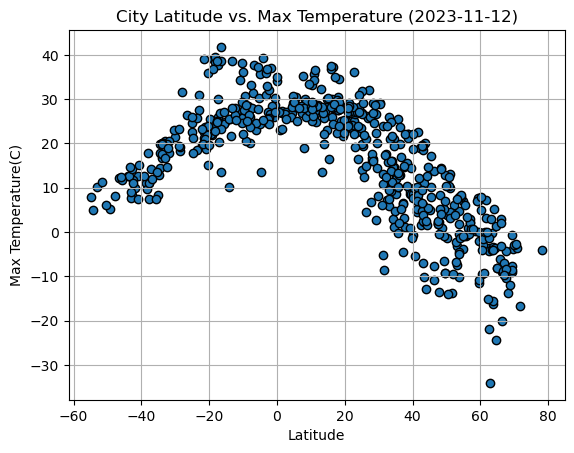

In [9]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
lat_vs_temp_plot = plt.scatter(lat, max_temp, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title(f"City Latitude vs. Max Temperature ({year}-{month}-{day})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

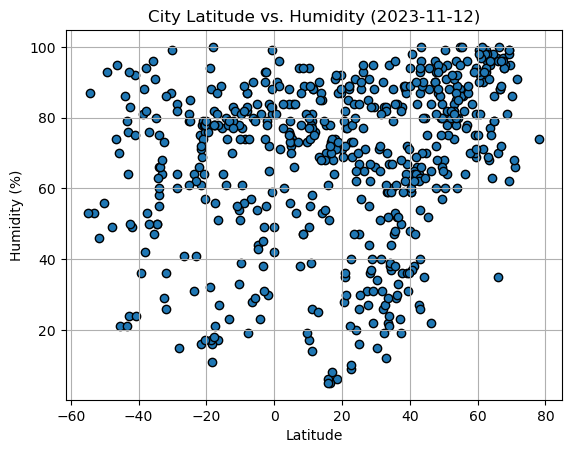

In [10]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
lat_vs_humidity_plot = plt.scatter(lat, humidity, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({year}-{month}-{day})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

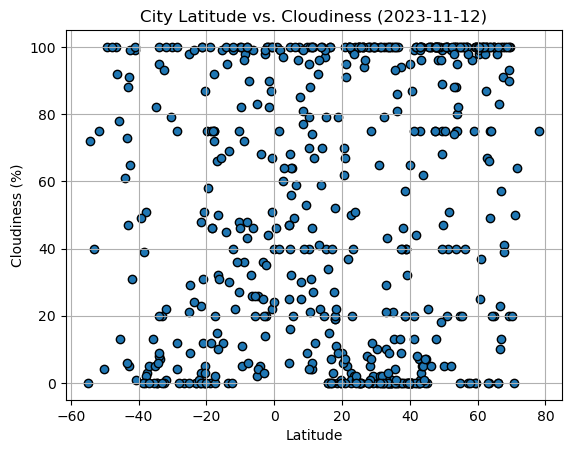

In [11]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
lat_vs_cloud_plot = plt.scatter(lat, cloudiness, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({year}-{month}-{day})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

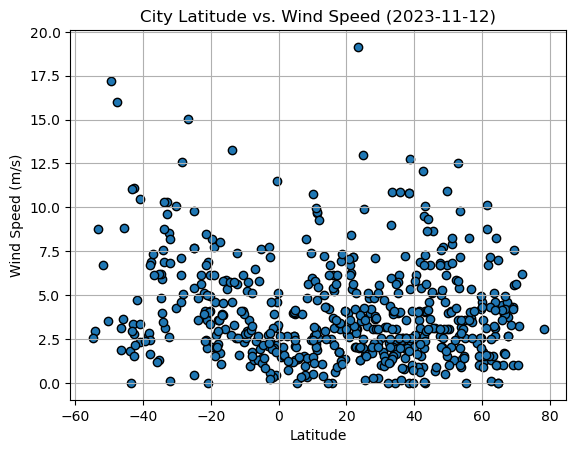

In [12]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
lat_vs_wind_plot = plt.scatter(lat, wind_speed, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({year}-{month}-{day})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lin_reg(x_values, y_values, x_line, y_line):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(x_line,y_line),fontsize=15,color="red")
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Date y/m/d
City_ID,,,,,,,,,,
0,jamestown,42.0970,-79.2353,5.57,66,0,1.54,US,2023-11-12 15:04:11,2023-11-12
1,ciudad lazaro cardenas,17.9583,-102.2000,27.53,73,19,1.76,MX,2023-11-12 15:05:46,2023-11-12
2,la passe,45.5549,-0.8967,17.13,88,100,8.66,FR,2023-11-12 15:05:46,2023-11-12
4,ribeira grande,38.5167,-28.7000,21.54,88,20,10.80,PT,2023-11-12 15:05:46,2023-11-12
5,utrik,11.2278,169.8474,27.56,79,100,9.70,MH,2023-11-12 15:05:46,2023-11-12


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Date y/m/d
City_ID,,,,,,,,,,
3,invercargill,-46.4000,168.3500,12.23,95,92,3.13,NZ,2023-11-12 15:05:46,2023-11-12
6,adamstown,-25.0660,-130.1015,22.67,79,98,7.67,PN,2023-11-12 15:05:46,2023-11-12
11,lebu,-37.6167,-73.6500,11.10,53,3,6.86,CL,2023-11-12 15:03:10,2023-11-12
12,papatowai,-46.5619,169.4708,12.20,74,100,1.88,NZ,2023-11-12 15:05:47,2023-11-12
13,walvis bay,-22.9575,14.5053,27.53,41,0,5.66,NaN,2023-11-12 15:05:47,2023-11-12


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7331563750326766


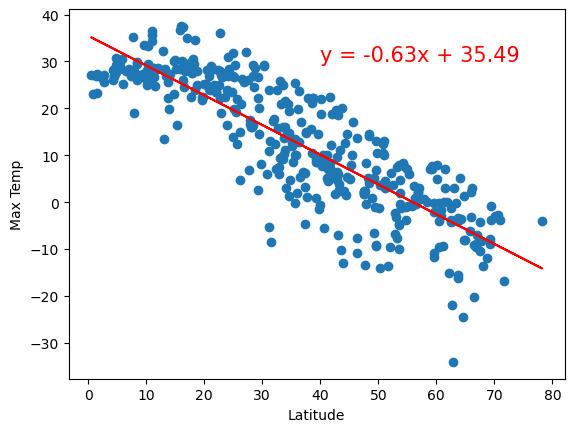

In [16]:
# Linear regression on Northern Hemisphere
lat = northern_hemi_df["Lat"]
max_temp = northern_hemi_df["Max Temp"]
lat_vs_temp_plot = plt.scatter(lat, max_temp)

#Axis labels
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

#Cordinates for positioning the regression equation on the graph
x_line = 40
y_line = 30

#Adding regression line
lin_reg(lat, max_temp, x_line, y_line)

# Show plot
plt.show()

The r-squared is: 0.5816769588781726


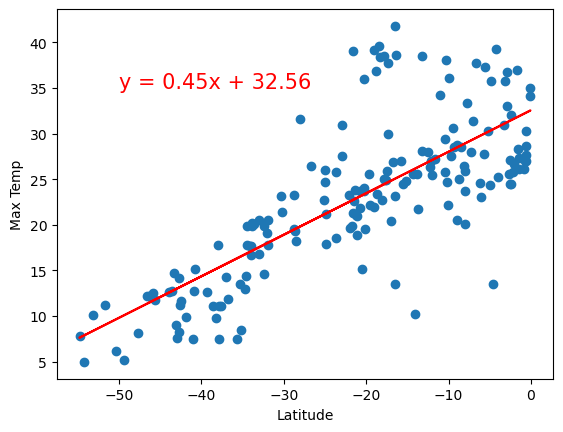

In [17]:
# Linear regression on Southern Hemisphere
lat = southern_hemi_df["Lat"]
max_temp = southern_hemi_df["Max Temp"]
lat_vs_temp_plot = plt.scatter(lat, max_temp)

#Axis labels
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

#Cordinates for positioning the regression equation on the graph
x_line = -50
y_line = 35

#Adding the regression line
lin_reg(lat, max_temp, x_line, y_line)

# Show plot
plt.show()

**Discussion about the linear relationship:** For the two above plots, the r-squared values, and the linear regressions show there is a relationship between latitude and maximum temperature of an area. For both the Northern and Southern hemispheres, in general, the closer you move towards the equator the higher the max temperature. The r-squared of the Northen Hemisphere is 0.73, showing a strong relationship between latitude and temperature, the r-squared for the Southern Hemisphere is less, 0.58, but this still shows a moderately strong relationship between latitude and temperature for the Southern hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.08828734096518155


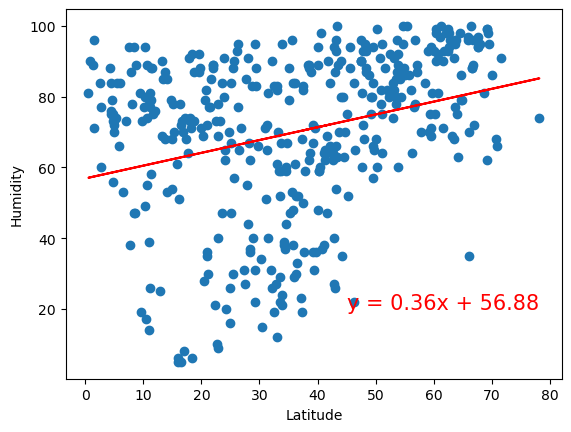

In [18]:
# Northern Hemisphere
lat = northern_hemi_df["Lat"]
humidity = northern_hemi_df["Humidity"]
lat_vs_humidity_plot = plt.scatter(lat, humidity)

#Axis labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Cordinates for positioning the regression equation on the graph
x_line = 45
y_line = 20

#Adding regression line
lin_reg(lat, humidity, x_line, y_line)

plt.show()

The r-squared is: 0.0009305556828844312


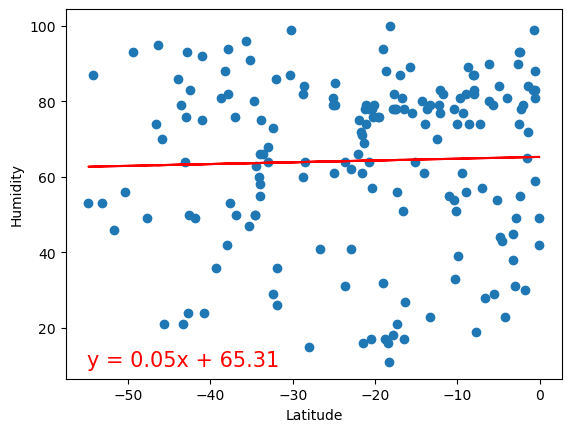

In [19]:
# Southern Hemisphere
lat = southern_hemi_df["Lat"]
humidity = southern_hemi_df["Humidity"]
lat_vs_humidity_plot = plt.scatter(lat, humidity)

#Axis labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Cordinates for positioning the regression equation on the graph
x_line = -55
y_line = 10

#Adding regression line
lin_reg(lat, humidity, x_line, y_line)

plt.show()

**Discussion about the linear relationship:** For the two above plots, the r-squared values, and the linear regressions show there is an extremely weak, if any, relationship between latitude and humidity of an area. While the linear regression line on the plot for the Northern Hemisphere does show as latitude increases humidity increases, the r-squared for the regression equation is 0.01, showing that the relation is at most very weak. The r-squared for the Southern Hemisphere is even lower, 0.0009, showing there is likely not a relationship between latitude and humidity for the Southern Hemisphere. Also, given that the regression line for the Souther Hemisphere is almost flat, this is pointing to there likely being no relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.028335625286736853


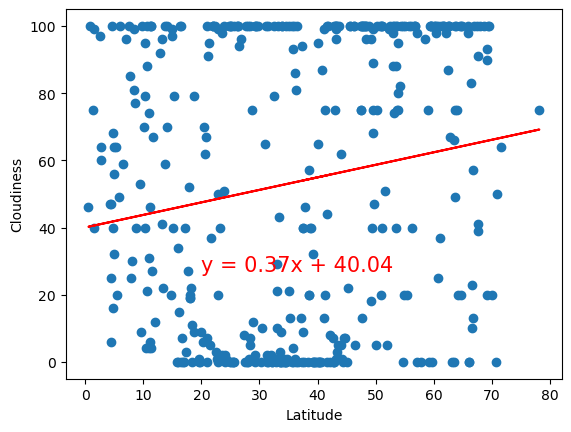

In [20]:
# Northern Hemisphere
lat = northern_hemi_df["Lat"]
cloudiness = northern_hemi_df["Cloudiness"]
lat_vs_cloud_plot = plt.scatter(lat, cloudiness)

#Axis labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Cordinates for positioning the regression equation on the graph
x_line = 20
y_line = 27

#Adding regression line
lin_reg(lat, cloudiness, x_line, y_line)

# Show plot
plt.show()

The r-squared is: 0.009918616229777782


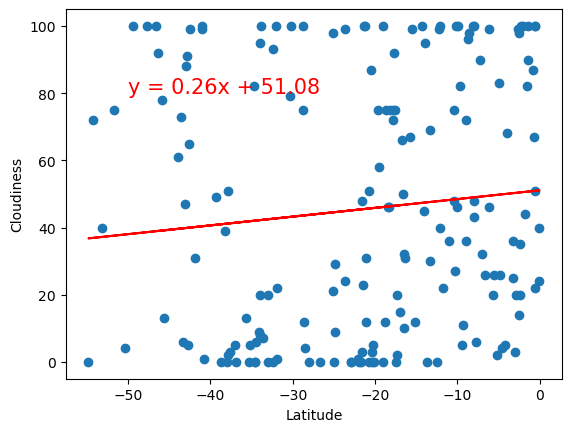

In [21]:
# Southern Hemisphere
lat = southern_hemi_df["Lat"]
cloudiness = southern_hemi_df["Cloudiness"]
lat_vs_cloud_plot = plt.scatter(lat, cloudiness)

#Axis labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Cordinates for positioning the regression equation on the graph
x_line = -50
y_line = 80

#Adding regression line
lin_reg(lat, cloudiness, x_line, y_line)

# Show plot
plt.show()

**Discussion about the linear relationship:** Results for the relationship between latitude and cloudiness are similar to the results for the relationship between latitude and humidity, again showing a weak, if any relationship. The r-squared for the Northern Hemisphere is 0.03, while the r-squared for the Southern Hemisphere is 0.01, showing very little if any relationship between cloudiness and latitude, and giving the interpretation of the regression equation very little explanatory power.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0020917445970850064


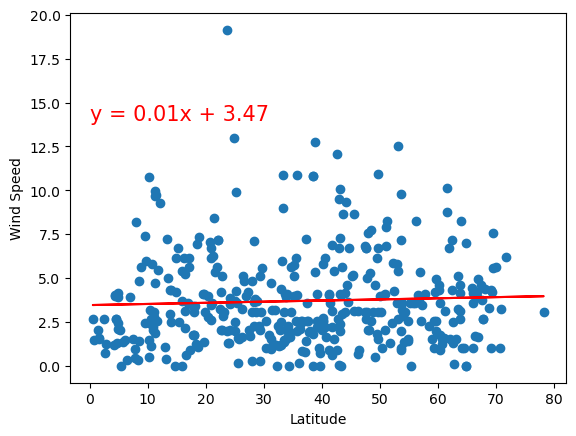

In [22]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. wind speed
lat = northern_hemi_df["Lat"]
wind_speed = northern_hemi_df["Wind Speed"]
lat_vs_wind_plot = plt.scatter(lat, wind_speed)

#Axis labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Cordinates for positioning the regression equation on the graph
x_line = 0
y_line = 14

#Adding regression line
lin_reg(lat, wind_speed, x_line, y_line)

# Show plot
plt.show()

The r-squared is: 0.08651357218900568


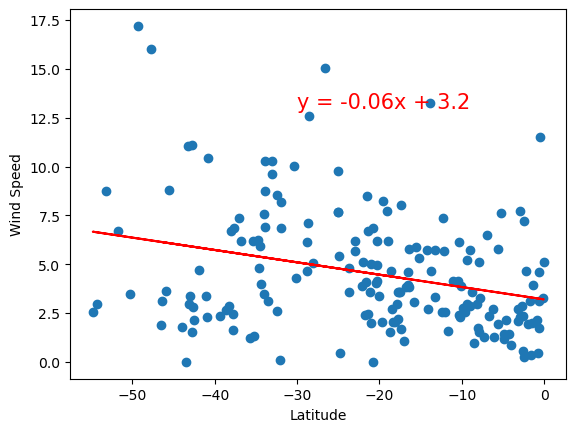

In [23]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. wind speed
lat = southern_hemi_df["Lat"]
wind_speed = southern_hemi_df["Wind Speed"]
lat_vs_wind_plot = plt.scatter(lat, wind_speed)

#Axis labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Cordinates for positioning the regression equation on the graph
x_line = -30
y_line = 13

#Adding regression line
lin_reg(lat, wind_speed, x_line, y_line)

# Show plot
plt.show()

**Discussion about the linear relationship:** The results for the relationship between latitude and wind speed also show a likely weak relationship, if any relationship. While the regression line for the Southern Hemisphere is showing as you move towards the equator wind speed decreases, the r-squared is 0.09, meaning this is at best a very weak relationship. The regression line for the Northern Hemisphere is almost flat and the r-squared is 0.002, showing for the Northern Hemisphere, there is very little if any relationship between latitude and wind speed.